# **Name: *Stefan Lacher***

## **Data Science and Business Analyst Internship**

### Task 3: Exploratory Data Analysis - Retail


Tasks:
*   Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’
*   As a business manager, try to find out the weak areas where you can
work to make more profit.
*   What all business problems you can derive by exploring the data?

Language: Python

Dataset: https://drive.google.com/file/d/1lV7is1B566UQPYzzY8R2ZmOritTW299S/view






### **General steps**

In [4]:
#import pandas and load the Data
import pandas as pd
df = pd.read_csv('SampleSuperstore.csv')


In [5]:
# To start with, I want to look at the columns and first 5 rows so that I can get a better understanding of the data. So I use head ().
df.head(5)


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


Here you can see that the columns are called as follows:

Ship Mode, Segment, Country, City, State, Postal Code, Region, Category, Sub-Category, Sales, Quantity, Discount, Profit

In [6]:
#In the next step I use the info () method to get more information.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


Here you can see that there are 13 columns and 9994 rows. There are also 3 data types float, integer and object.

In [7]:
#Since I do not have any information about missing values yet, these will be considered in the following.
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Here it can be seen that there are no missing values in this data.

In [8]:
#To see if there are duplicates, duplicated () is used and for the sum of the duplicates sum ().
df.duplicated().sum()

17

In [9]:
#In the next step, the duplicates are excluded.
df.drop_duplicates(keep='first', inplace=True)

In [10]:
df.shape

(9977, 13)

In the last few steps it was found that there were 17 duplicates, these were removed and the first one kept. Thus the series changed from 9994 to 9977.

In [11]:
#The characteristics of the columns are considered here.
df.nunique(axis=0)


Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

### **Exploratory Data Analysis**

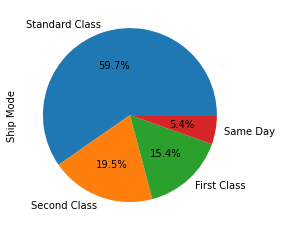

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
df['Ship Mode'].value_counts().plot(kind='pie', autopct="%.1f%%")

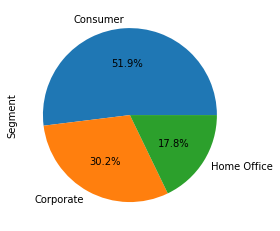

In [67]:
df['Segment'].value_counts().plot(kind='pie', autopct="%.1f%%")

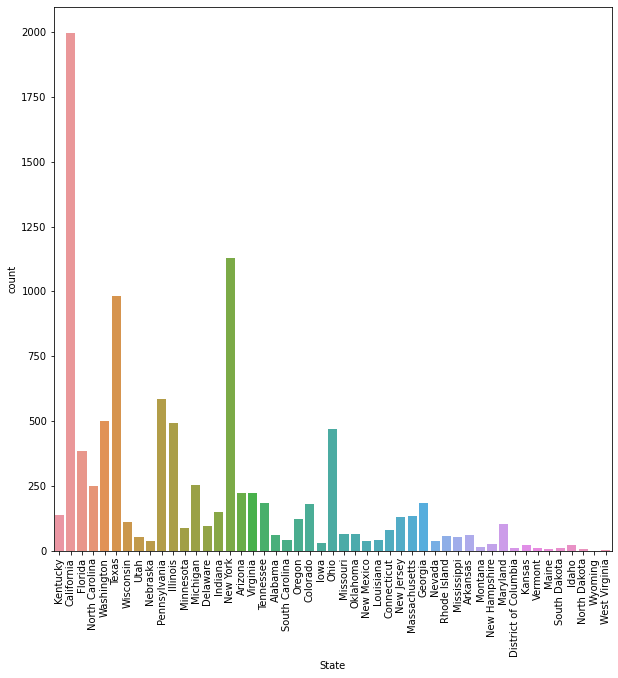

In [68]:
plt.figure(figsize=(10,10))
sns.countplot(x=df['State'])
plt.xticks(rotation=90)
plt.show()

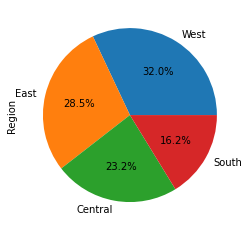

In [69]:
df['Region'].value_counts().plot(kind='pie', autopct="%.1f%%")

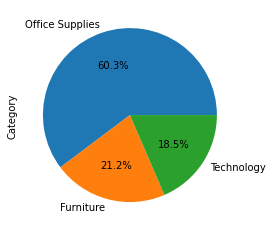

In [70]:
df['Category'].value_counts().plot(kind='pie', autopct="%.1f%%")

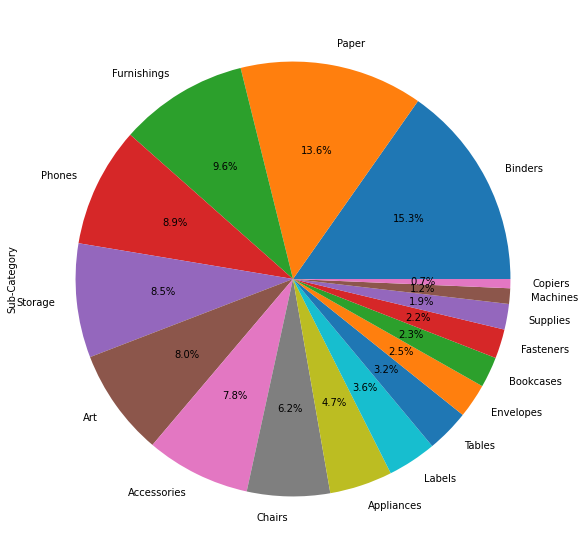

In [71]:
plt.figure(figsize=(10,10))
df['Sub-Category'].value_counts().plot(kind='pie', autopct="%.1f%%")

An exploratory data analysis was carried out in the plots shown. Different things can be considered in this regard. In Ship Mode, around 60% Standard Class is used, followed by Second Class, First Class and Same Day. When choosing the segment, it can be seen that consumer has the highest number with around 52%, corporate around 30% and home office around 18%. Looking at State, it can be said that the top 3 are California, New York, and Texas. Wyoming has no number. Region is divided into West with 32%, East with 28.5%, Central with 23.2% and South with 16.2%. In the next plot you can see that there are three categories, office supplies with 60.3% dominating over furniture with 21.2% and technology with 18.5%. A similar picture can be recognized for the sub-category.

### **Column profit comparison**

This is the question:

As a business manager, try to find out the weak areas where you can work to make more profit.

Thus, a data analysis is set between the individual columns in relation to profit.

        Ship Mode       Profit
0     First Class   48953.6561
1        Same Day   15871.8869
2    Second Class   57446.6516
3  Standard Class  163969.2280


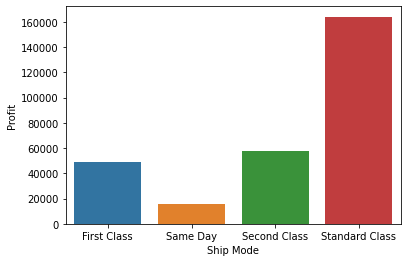

In [28]:
smp = df.groupby(['Ship Mode'], as_index=False)['Profit'].sum()
print(smp)
sns.barplot(x = smp['Ship Mode'], y = smp['Profit'])


Here it can be seen that in Ship Mode 'Same Day' the least profit is made and in 'Standard Class' the most profit is made.

       Segment       Profit
0     Consumer  134007.4413
1    Corporate   91954.9798
2  Home Office   60279.0015


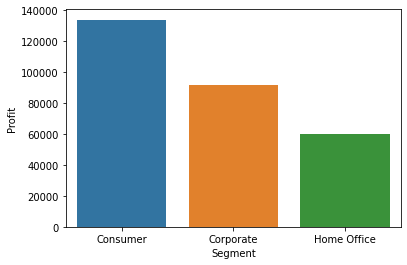

In [ ]:
sp = df.groupby(['Segment'], as_index=False)['Profit'].sum()
print(sp)
sns.barplot(x = sp['Segment'], y = sp['Profit'])

It can be seen that home offices make the least profit and consumers make the most profit.

Since only USA is represented in the next column 'Country', the profit is not compared here.

            City     Profit
0       Aberdeen     6.6300
1        Abilene    -3.7584
2          Akron  -186.6356
3    Albuquerque   634.0881
4     Alexandria   318.6183
..           ...        ...
526   Woonsocket    78.6791
527      Yonkers  2767.7557
528         York  -102.1692
529      Yucaipa    13.2080
530         Yuma  -465.9909

[531 rows x 2 columns]


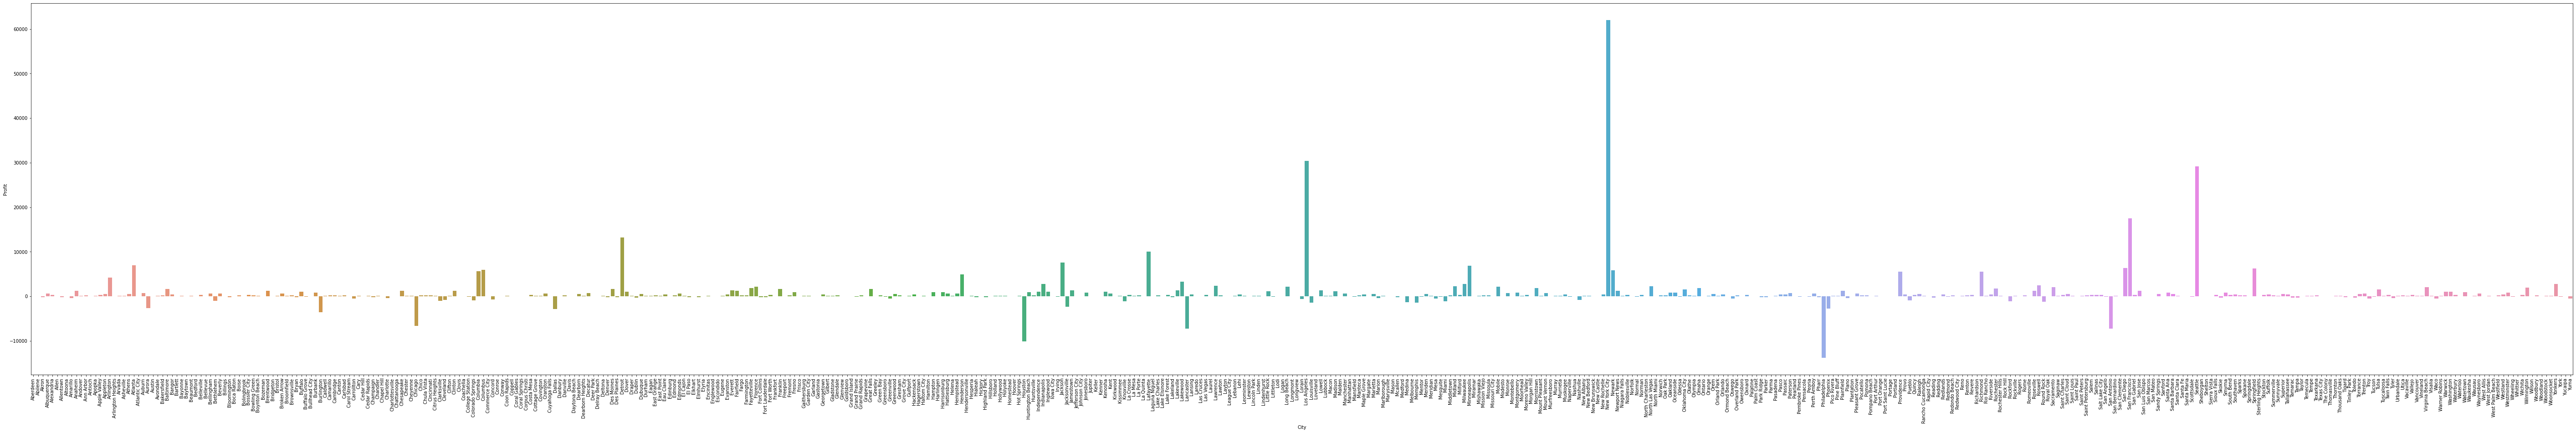

              City      Profit
329  New York City  62013.8973
266    Los Angeles  30431.4267
452        Seattle  29121.6825
             City      Profit
374  Philadelphia -13843.2106
207       Houston -10175.1755
434   San Antonio  -7299.0502


In [ ]:
cip = df.groupby(['City'], as_index=False)['Profit'].sum()
print(cip)
plt.figure(figsize=(100,15))
sns.barplot(x = cip['City'], y = cip['Profit'])
plt.xticks(rotation=90)
plt.show()

dftop3_cities = df.groupby('City')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)
dfworst3_cities = df.groupby('City')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=True)

print(dftop3_cities.head(3))
print(dfworst3_cities.head(3))

Here it can be seen that New York City makes the highest profit and Philadelphia the highest loss.

                   State      Profit
0                Alabama   5786.8253
1                Arizona  -3427.9246
2               Arkansas   4008.6871
3             California  76330.7891
4               Colorado  -6527.8579
5            Connecticut   3511.4918
6               Delaware   9977.3748
7   District of Columbia   1059.5893
8                Florida  -3399.3017
9                Georgia  16250.0433
10                 Idaho    826.7231
11              Illinois -12601.6500
12               Indiana  18382.9363
13                  Iowa   1183.8119
14                Kansas    836.4435
15              Kentucky  11199.6966
16             Louisiana   2196.1023
17                 Maine    454.4862
18              Maryland   7031.1788
19         Massachusetts   6785.5016
20              Michigan  24428.0903
21             Minnesota  10823.1874
22           Mississippi   3172.9762
23              Missouri   6436.2105
24               Montana   1833.3285
25              Nebraska   2037.0942
2

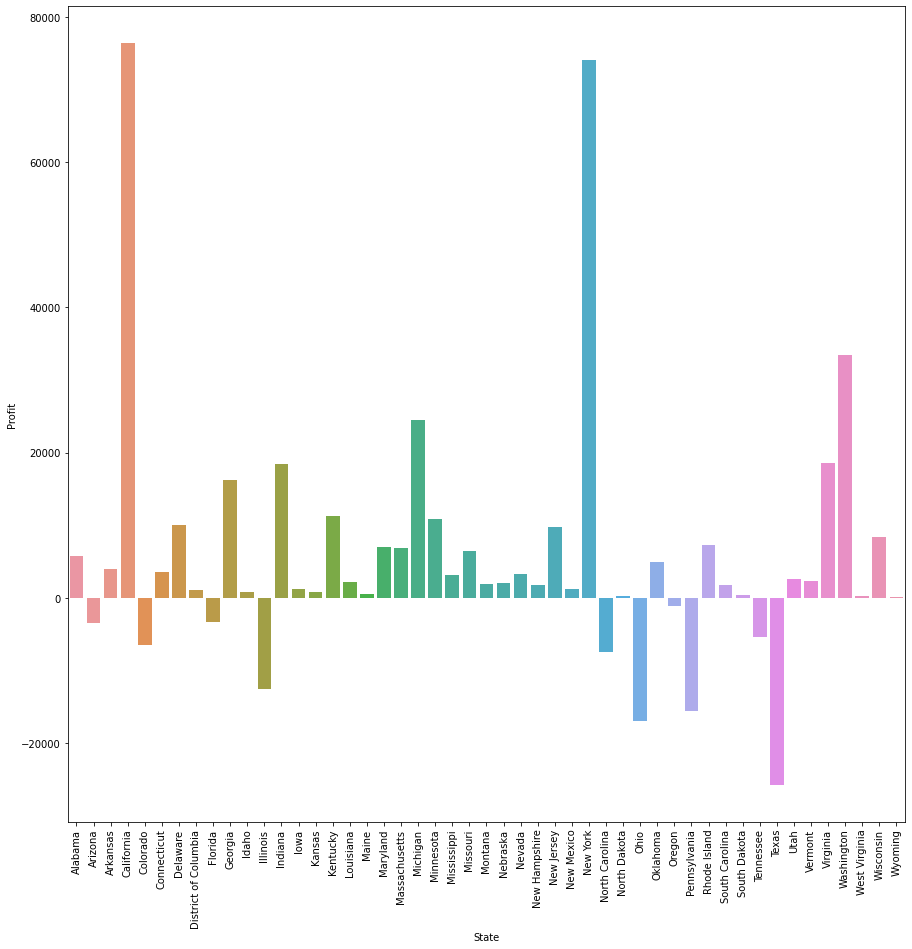

         State      Profit
3   California  76330.7891
30    New York  74015.4622
45  Washington  33368.2375
           State      Profit
41         Texas -25750.9833
33          Ohio -16959.3178
36  Pennsylvania -15565.4035


In [ ]:
stp = df.groupby(['State'], as_index=False)['Profit'].sum()
print(stp)
plt.figure(figsize=(15,15))
sns.barplot(x = stp['State'], y = stp['Profit'])
plt.xticks(rotation=90)
plt.show()

dftop3_states = df.groupby('State')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)
dfworst3_states = df.groupby('State')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=True)

print(dftop3_states.head(3))
print(dfworst3_states.head(3))

Interestingly, California makes the highest profit here, followed by New York, although this could not be seen in cities. The same is true for loss. Texas makes the highest loss in this case, while Pennsylvania ranks third after Ohio.

In [ ]:
dftop3_postalcodes = df.groupby('Postal Code')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)
dfworst3_postalcodes = df.groupby('Postal Code')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=True)

print(dftop3_postalcodes.head(3))
print(dfworst3_postalcodes.head(3))

    Postal Code      Profit
54        10024  21653.7248
55        10035  16533.8669
52        10009  13697.0019
     Postal Code     Profit
441        78207 -7299.0502
221        43130 -7149.6180
109        27217 -5894.5269


Here you can see that most of the profit is made in the 10024 postal code and most of the loss is made in the 78207 postal code.

    Region       Profit
0  Central   39655.8752
1     East   91506.3092
2    South   46749.4303
3     West  108329.8079


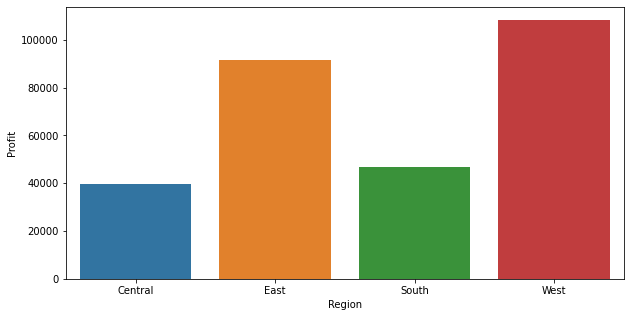

In [ ]:
rp = df.groupby(['Region'], as_index=False)['Profit'].sum()
print(rp)
plt.figure(figsize=(10,5))
sns.barplot(x = rp['Region'], y = rp['Profit'])
plt.show()



In the next bar plot you can see that the western region is the most profitable and the region 'Central' is the least profitable.

          Category       Profit
0        Furniture   18421.8137
1  Office Supplies  122364.6608
2       Technology  145454.9481


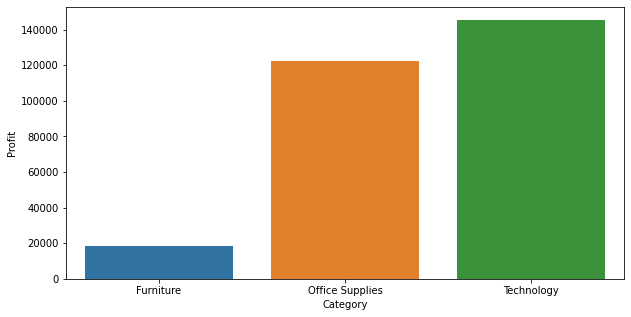

In [ ]:
cap = df.groupby(['Category'], as_index=False)['Profit'].sum()
print(cap)
plt.figure(figsize=(10,5))
sns.barplot(x = cap['Category'], y = cap['Profit'])
plt.show()

Here you can see that the 'Technology' category makes the most profit and 'Furniture' the least.

   Sub-Category      Profit
0   Accessories  41936.6357
1    Appliances  18138.0054
2           Art   6524.6118
3       Binders  30228.0003
4     Bookcases  -3472.5560
5        Chairs  26567.1278
6       Copiers  55617.8249
7     Envelopes   6964.1767
8     Fasteners    949.5182
9   Furnishings  13052.7230
10       Labels   5526.3820
11     Machines   3384.7569
12        Paper  33944.2395
13       Phones  44515.7306
14      Storage  21278.8264
15     Supplies  -1189.0995
16       Tables -17725.4811


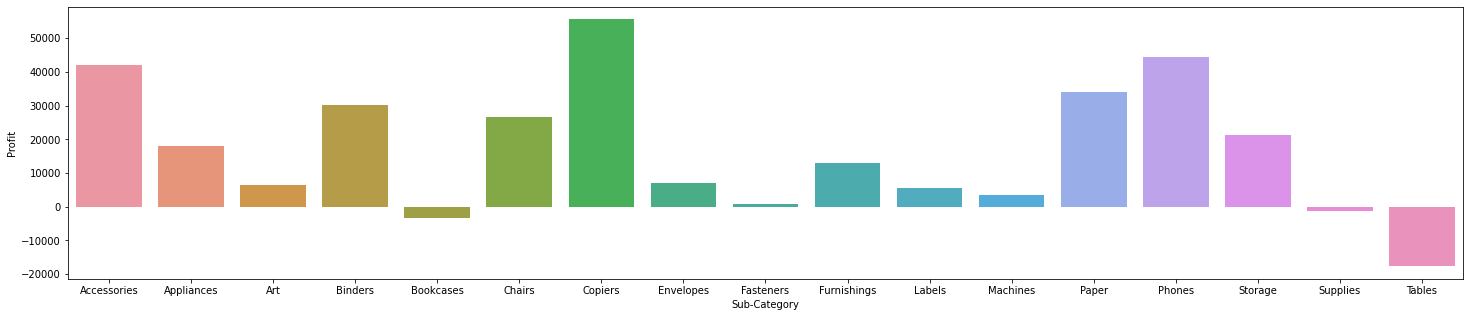

   Sub-Category      Profit
6       Copiers  55617.8249
13       Phones  44515.7306
0   Accessories  41936.6357
   Sub-Category      Profit
16       Tables -17725.4811
4     Bookcases  -3472.5560
15     Supplies  -1189.0995


In [ ]:
scap = df.groupby(['Sub-Category'], as_index=False)['Profit'].sum()
print(scap)
plt.figure(figsize=(25,5))
sns.barplot(x = scap['Sub-Category'], y = scap['Profit'])
plt.show()

dftop3_subcategory = df.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)
dfworst3_subcategory = df.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=True)

print(dftop3_subcategory.head(3))
print(dfworst3_subcategory.head(3))

In the sub-categories you can see that copiers make the most profit and tables make the most loss.

         Sales     Profit
5823  17499.95  8399.9760
5822  13999.96  6719.9808
5820  10499.97  5039.9856
         Sales     Profit
5798  4499.985 -6599.9780
5812  7999.980 -3839.9904
5711  2177.584 -3701.8928


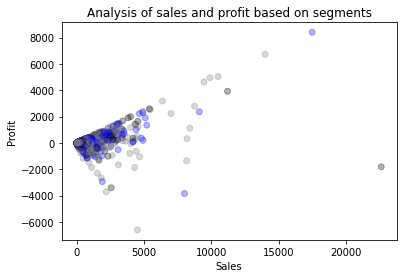

In [56]:
dftop3_sales = df.groupby('Sales')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)
dfworst3_sales = df.groupby('Sales')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=True)

print(dftop3_sales.head(3))
print(dfworst3_sales.head(3))


fig, ax = plt.subplots()
colors = {'Consumer':'Gray', 'Corporate':'Blue', 'Home Office':'Black'}
ax.scatter(x=df['Sales'], y=df['Profit'], c=df['Segment'].apply(lambda x: colors[x]), alpha=0.3)
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.title("Analysis of sales and profit based on segments")
plt.show()

From the sales and the profit you can see a positive trend. So it can be said that when sales increase, profit also increases. We can also deduce that most of the profit comes from the consumer segment. Therefore, they should focus on meeting as many of the needs of the consumer segment as possible. Another possibility would be to promote the weakest segment, namely home office.

In the next step, total sales and total profit are considered.

In [52]:
totalsales = df['Sales'].sum()
totalprofit = df['Profit'].sum()
print("Total sales: {}".format(totalsales))
print("Total profit: {}$".format(totalprofit))

Total sales: 2296195.5903
Total profit: 286241.4226$


Thus, the total sales are around 2.3 million pieces and the total profit is $ 286241.

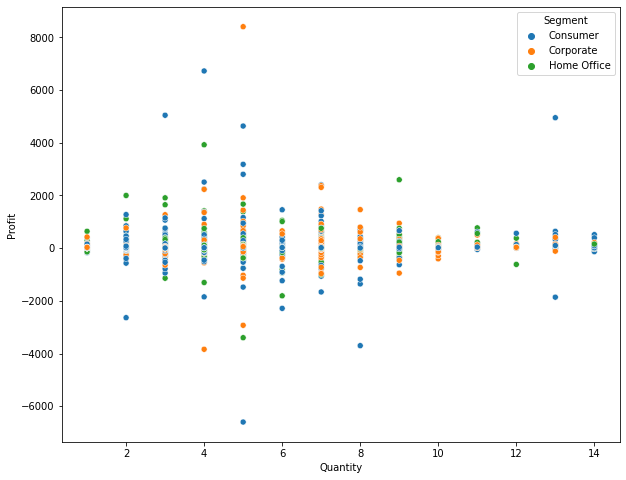

In [59]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Quantity', y='Profit', hue='Segment', data=df)
plt.show()

Here we can have a brief idea of which segment, along with the quantity, generates more profit.

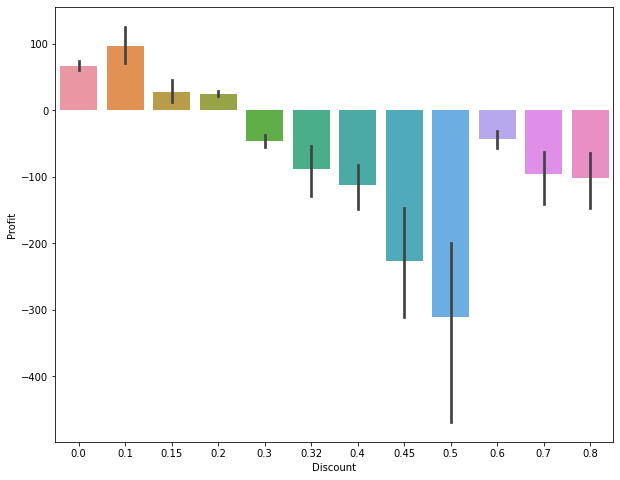

In [65]:
plt.figure(figsize=(10,8))
sns.barplot(x='Discount', y='Profit', data=df)
plt.show()

Here it can be seen that most profit is made when a discount of 10% is given and most loss is made when a discount of 50% is given.

### **Conclusion**


**As a business manager, try to find out the weak areas where you can work to make more profit.**

Different areas were considered in the data analysis. Among other things, the weak areas could be identified that could be improved.

In Ship Mode there is room for improvement in 'Same Day', while the 'home office' segment needs improvement.

Philadelphia and Texas make the biggest losses. One could start here in order to obtain an improvement. The greatest loss is made with the postal code 78207. Looking at the regions, it can be said that 'Central' is the least profitable.

In the categories, the lowest profit could be seen in 'Furniture' and in the sub-categories 'Tables'. An improvement here might be useful.

Finally, sales, quantity and discount were considered. Here it can be said that a sales increase also increases profit. With a discount of 50% most losses are made and with 10% most profit, so it would make sense to stick to 10%.

**What all business problems you can derive by exploring the data?**

One problem could be that no products are sold in Wyoming. Losses are also made in different cities. In this regard, one should consider whether no products should be offered in these cities in the future or whether there is potential for improvement in these cities. Bookcases, supplies and tables also make losses. Here, too, the consideration is whether these products should no longer be offered for sale. With a discount, losses are made from 30%. Profits are made between 0 and 20%, so a sensible step would be to only give discounts of up to 20%.